In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc 
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

Valor promedio de una función:

$$ \bar{f} = \frac{1}{b-a}\int_{a}^{b}f(x)dx $$

en consecuencia:

$$ \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) = \frac{1}{b-a}\int_{a}^{b}f(x)dx $$

En general, se usan los puntos muestrales que siguen una distribución $g(x)$ para integrar una función $f(x)$. La siguiente aproximación se satisface según la ley de grandes números:

$$ \frac{\int g(x)f(x)dx}{\int g(x)dx} = < f(x) > =  \lim_{N \to \infty} \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$

Calcular la integral:

$$ \int_{0}^{\frac{\pi}{2}} xsin(x) dx $$

In [53]:
def f(x):
    return x*np.sin(x)

def MCIntegral(f,  N = 100 ):
    
    x = np.random.rand( int(N) )* 0.5*np.pi
     
    return np.average(f(x))*(0.5*np.pi),f(x)

In [54]:
I, h = MCIntegral(f,N=100)
print(I)

0.9370887465719442


In [48]:
x = np.random.exponential(4,size=1000)

15.821646313887005


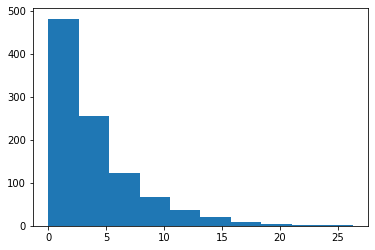

In [50]:
plt.hist(x)
print(np.std(x)**2)

Queremos calcular el segundo momento de la distribución usando el método de Montecarlo.
$$ x \sim exp(4) $$ 
$$ f(x) = \frac{1}{4}e^{\frac{-x}{4}} $$  
$$ E(x^{2}) = \int_{0}^{\infty}\frac{1}{4} x^{2} e^{\frac{-x}{4}} dx = 32$$

Hacer cambio de variable $y = \frac{1}{1+x}$

In [55]:
func = ( lambda x: x, lambda x: x**2 )

In [56]:
def WeightedIntegral(f, N = 1000, alpha = 1.):
    
    x = np.random.exponential(alpha,size=int(N))
    
    return np.average(f(x))

In [57]:
moment1 = WeightedIntegral(func[0], N = 1e6, alpha=4)
moment2 = WeightedIntegral(func[1], N = 1e6, alpha=4)

In [58]:
print(moment1)
print(moment2)

3.999912633999733
31.97985409164045


In [59]:
mean = moment1
var = moment2 - moment1**2
print(mean, var)

3.999912633999733 15.98055301200977


coeficiente de asimetría

$$  \gamma = \mathbb{E}( ((x - \mathbb{E}(x)) / \sigma ) ^{3}  )  $$

In [62]:
def Asimetria(mean, std, N = 1000, alpha = 1):
    
    x = np.random.exponential(alpha,size=int(N))
    
    moment3 = np.average( ((x-mean)/std)**3 )
    
    return moment3

In [64]:
asi = []

for _ in range(100):
    asi.append(Asimetria(mean, np.sqrt(var), N = 1e6, alpha = 4))
    

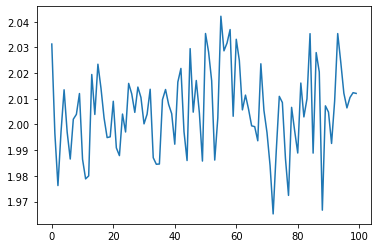

In [65]:
plt.plot(asi)

In [66]:
np.mean(asi)

2.0054417722998994